# Predicting term deposit in bank

### Executive summary

In this case, the data pertains to a direct marketing campaign (phone calls) by a Portuguese banking institution. Classification goals include predicting whether the client will subscribe to a term deposit (variable y).

This dataset was found at UCI Machine Learning Repository, which is an amazing resource for publicly available datasets. Among the four dataset variants, we chose "bank.csv", which consists of 4521 data points with 16 independent variables, 5 of which are numeric and 11 categorical. Below is a list of the features available to us:

Data on bank clients:


1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: 'yes','no')


### Issues and challenges: 

We are dealing with binary classification here. There are two classes: "yes" indicates that the customer subscribed to a term deposit, and "no" indicates that the customer did not subscribe.

In [1]:
import pandas as pd

In [2]:
dataset_bank_raw = pd.read_csv("https://raw.githubusercontent.com/sumitraju/data-science/main/bank_logistic_regression/data/bank.csv", sep=";")
dataset_bank = dataset_bank_raw.copy()
dataset_bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Exploratory Data Analysis

In [3]:
dataset_bank.shape

(4521, 17)

In [4]:
dataset_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
dataset_bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [6]:
dataset_bank.describe(exclude='object')

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
dataset_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Unique values

In [8]:
dataset_bank = dataset_bank.rename(columns={"y":"term_deposite"})
dataset_bank = dataset_bank.reindex(columns=["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","term_deposite"])

In [9]:
def unique_values__or_count(listOfColumns,options):
    for x in range(0, len(listOfColumns)-1, 1):
        if(options=="unique"):
            unique_values_str = dataset_bank[listOfColumns[x]].unique()
            print("unique_values " + listOfColumns[x])
            print(unique_values_str)
            print("------------------------")
        if(options=="count"):
            values_distribution = dataset_bank[listOfColumns[x]].value_counts()
            print("-----------"+listOfColumns[x] +"------------")
            print(values_distribution)
            print("-----------------------")

In [10]:
unique_values__or_count(['job','marital','education','default','housing','loan','contact','month','poutcome','term_deposite'],"count")

-----------job------------
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
-----------------------
-----------marital------------
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
-----------------------
-----------education------------
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
-----------------------
-----------default------------
no     4445
yes      76
Name: default, dtype: int64
-----------------------
-----------housing------------
yes    2559
no     1962
Name: housing, dtype: int64
-----------------------
-----------loan------------
no     3830
yes     691
Name: loan, dtype: int64
-----------------------
-----------contact------------
cellular     2896
unknown      132

In [11]:
unique_values__or_count(['job','marital','education','default','housing','loan','contact','month','poutcome','term_deposite'],"unique")

unique_values job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------
unique_values marital
['married' 'single' 'divorced']
------------------------
unique_values education
['primary' 'secondary' 'tertiary' 'unknown']
------------------------
unique_values default
['no' 'yes']
------------------------
unique_values housing
['no' 'yes']
------------------------
unique_values loan
['no' 'yes']
------------------------
unique_values contact
['cellular' 'unknown' 'telephone']
------------------------
unique_values month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
------------------------
unique_values poutcome
['unknown' 'failure' 'other' 'success']
------------------------


### Visualizations

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [13]:
import math

### Univariate Analysis

In [14]:
def count_plots_univariate(listOfColumns,plotType,dataset):
    totalCols=3
    totalRows=math.ceil(len(listOfColumns)/totalCols)
    widthForEachGraph=3
    fig = plt.figure(figsize=((totalCols+3)*3,(totalRows+1)*3))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for x in range(0, len(listOfColumns),1):
        globals()[f"ax_count_plots_{x}"] = fig.add_subplot(totalRows,totalCols,(x+1))
        globals()[f"ax_count_plots_{x}"].set_title(listOfColumns[x].upper()+" Count")
        #globals()[f"ax_count_plots_{x}"].set_xlabel('Colour')
        #globals()[f"ax_count_plots_{x}"].set_ylabel('Price')
        if(plotType=="countplot"):
            sns.countplot(y=listOfColumns[x],  data= dataset, ax=globals()[f"ax_count_plots_{x}"])
        if(plotType=="histogram"):
            globals()[f"ax_count_plots_{x}"].hist(dataset[listOfColumns[x]], bins=20)
    plt.show()
        

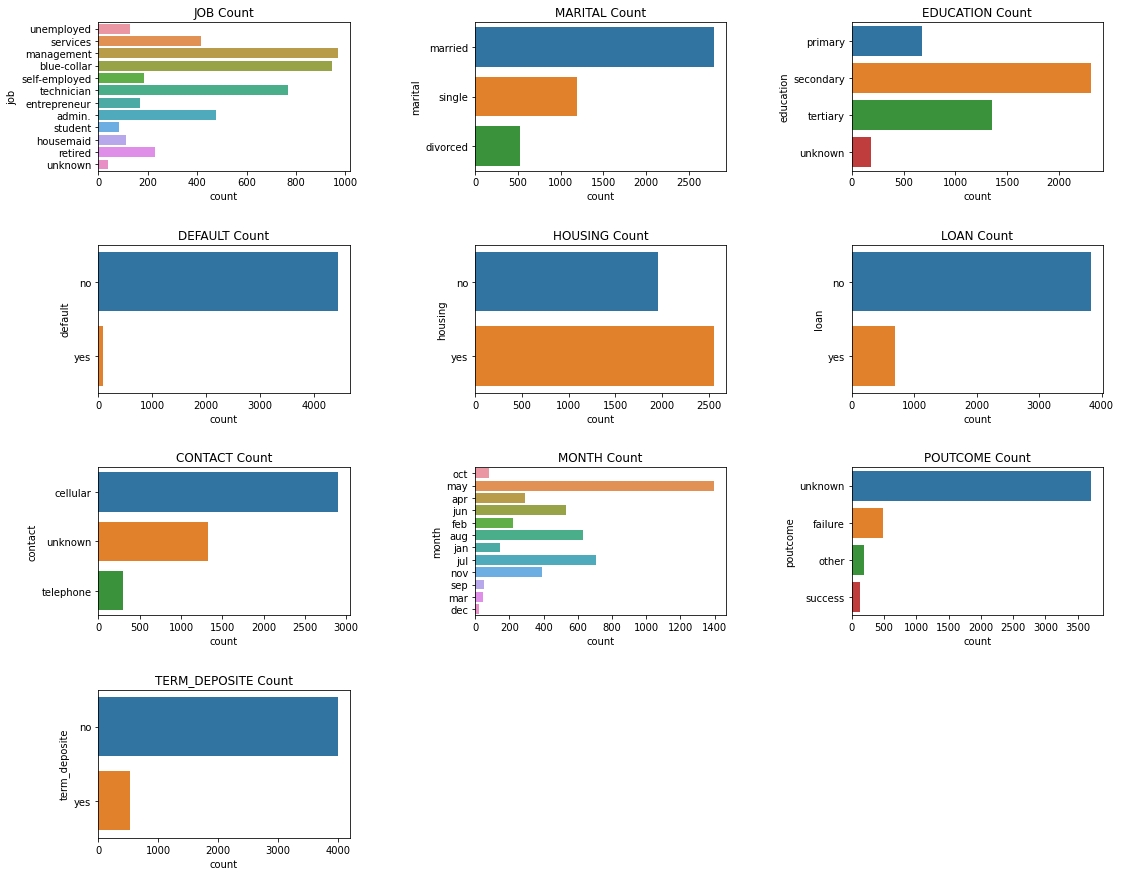

In [15]:
count_plots_univariate(['job','marital','education','default','housing','loan','contact','month','poutcome','term_deposite'],"countplot",dataset_bank)

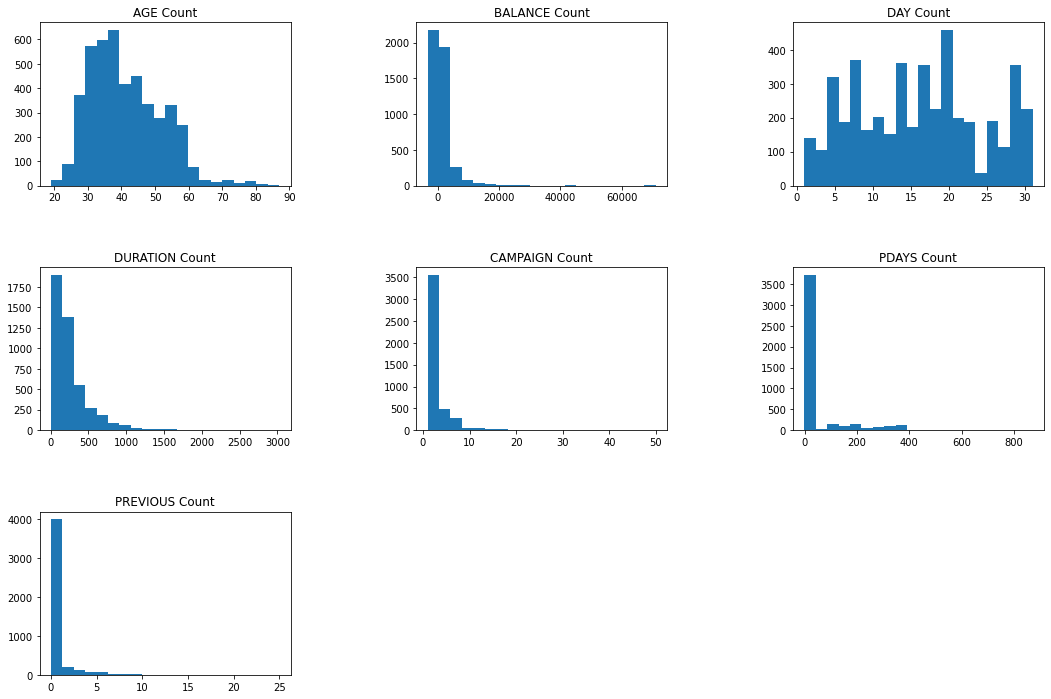

In [16]:
count_plots_univariate(["age","balance","day","duration","campaign","pdays","previous"],"histogram",dataset_bank)


In [17]:
# Calculate the mean of price, grouped by Wholesalers
mean_y = dataset_bank.groupby("job")["balance"].mean()

# Print the result
print(mean_y)

job
admin.           1226.736402
blue-collar      1085.161734
entrepreneur     1645.125000
housemaid        2083.803571
management       1766.928793
retired          2319.191304
self-employed    1392.409836
services         1103.956835
student          1543.821429
technician       1330.996094
unemployed       1089.421875
unknown          1501.710526
Name: balance, dtype: float64


### Bivariate Analysis

In [18]:
def count_plots_bivariate(listOfColumns,Y_col_name,plotType,dataset):
    totalCols=3
    totalRows=math.ceil(len(listOfColumns)/totalCols)
    widthForEachGraph=3
    fig = plt.figure(figsize=((totalCols+3)*3,(totalRows+1)*3))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for x in range(0, len(listOfColumns),1):
        globals()[f"ax_count_plots_{x}"] = fig.add_subplot(totalRows,totalCols,(x+1))
        globals()[f"ax_count_plots_{x}"].set_title(listOfColumns[x].upper()+" Count")
        #globals()[f"ax_count_plots_{x}"].set_xlabel('Colour')
        #globals()[f"ax_count_plots_{x}"].set_ylabel('Price')
        if(plotType=="scatter"):
            globals()[f"ax_count_plots_{x}"].scatter(dataset[listOfColumns[x]],dataset[Y_col_name])
        if(plotType=="box"):
            dataset.boxplot(listOfColumns[x], by=Y_col_name, ax=globals()[f"ax_count_plots_{x}"])
        if(plotType=="bar"):
            pd.crosstab(dataset[listOfColumns[x]], dataset[Y_col_name]).plot(kind='bar', ax=globals()[f"ax_count_plots_{x}"])
        if(plotType=="histogram"):   
            sns.histplot(data=dataset, y=listOfColumns[x], hue=Y_col_name, multiple="stack",ax=globals()[f"ax_count_plots_{x}"])
    plt.show()
        

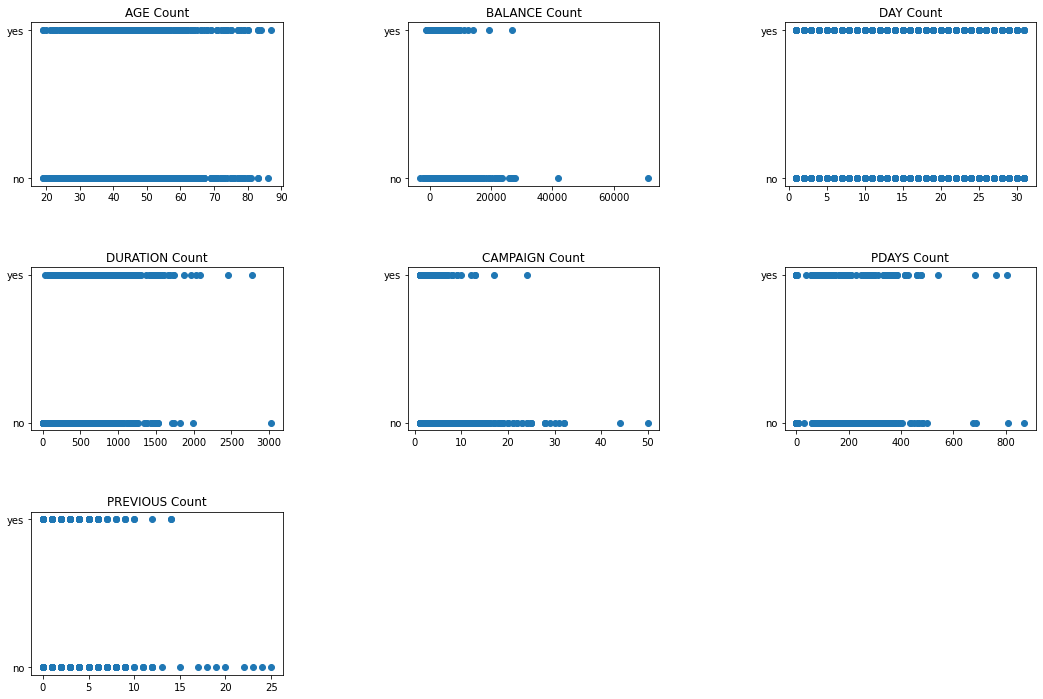

In [19]:
count_plots_bivariate(["age","balance","day","duration","campaign","pdays","previous"],"term_deposite","scatter",dataset_bank)


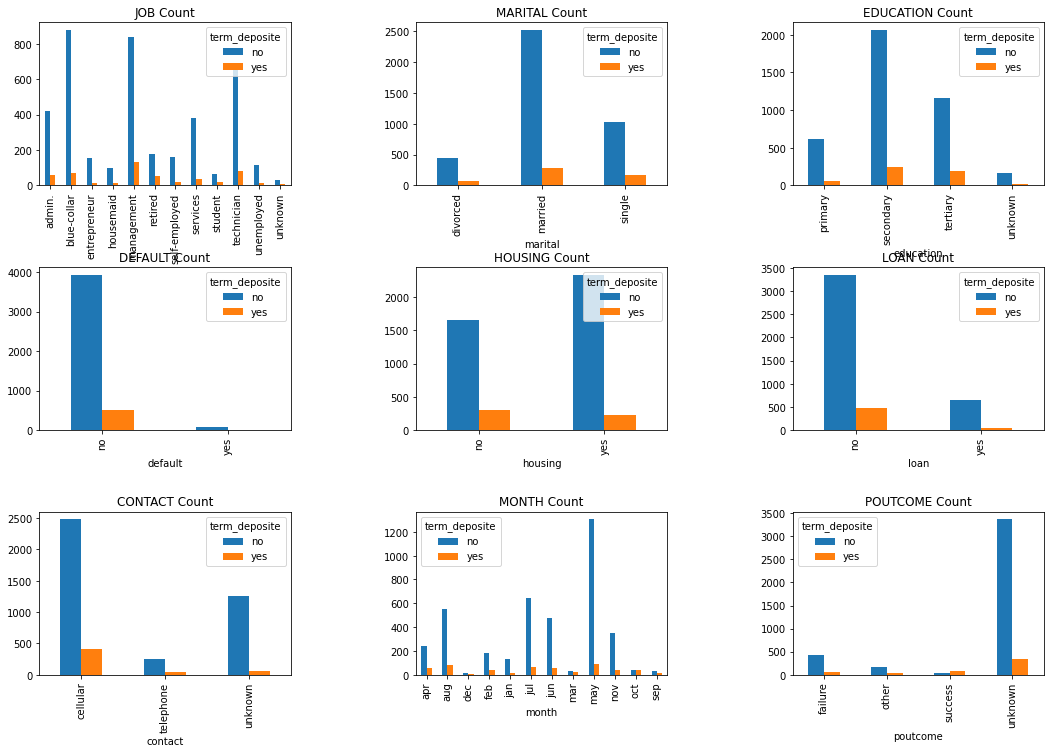

In [20]:
count_plots_bivariate(['job','marital','education','default','housing','loan','contact','month','poutcome'],"term_deposite","bar",dataset_bank)

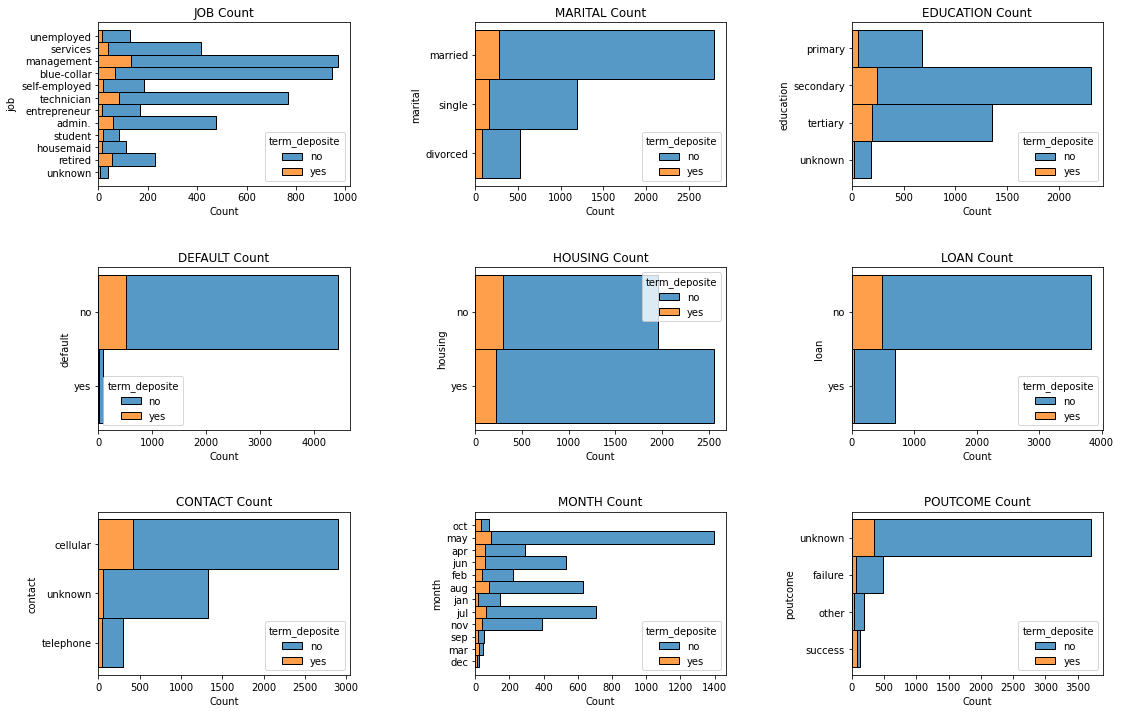

In [21]:
count_plots_bivariate(['job','marital','education','default','housing','loan','contact','month','poutcome'],"term_deposite","histogram",dataset_bank)

## Feature Engineering

One-hot encoding


In [23]:
dataset_bank_encoded = dataset_bank.copy()

In [24]:
dataset_bank_encoded["term_deposite"] = dataset_bank_encoded["term_deposite"].replace({'no': 0,'yes':1})

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [26]:
def OneHotEncoderCoding(listOfColumns,dataset):
    for x in range(0, len(listOfColumns),1):
        encoder = OneHotEncoder(sparse=False)
        column_encoded = encoder.fit_transform(dataset[[listOfColumns[x]]])
        feature_names = encoder.get_feature_names_out(input_features=[listOfColumns[x]])
        column_encoded = pd.DataFrame(column_encoded, columns=feature_names)

        dataset = dataset.drop([listOfColumns[x]], axis=1)
        dataset = pd.concat([dataset,column_encoded],axis=1)
    return dataset

In [27]:
dataset_bank_encoded = OneHotEncoderCoding(['job','marital','education','default','housing','loan','contact','month','poutcome'],dataset_bank_encoded)

In [28]:
dataset_bank_encoded.head(5)

,age,balance,day,duration,campaign,pdays,previous,term_deposite,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,33,4789,11,220,1,339,4,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,1350,16,185,1,330,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,1476,3,199,4,-1,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,59,0,5,226,1,-1,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Balancing the dataset

In [29]:
print(dataset_bank_encoded["term_deposite"].value_counts())

0    4000
1     521
Name: term_deposite, dtype: int64


In [30]:
X = dataset_bank_encoded.drop('term_deposite', axis=1)
Y = dataset_bank_encoded['term_deposite']
X.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,33,4789,11,220,1,339,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,1350,16,185,1,330,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,1476,3,199,4,-1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,59,0,5,226,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, Y)
y_resampled.value_counts()

0    4000
1    4000
Name: term_deposite, dtype: int64

In [33]:
X_resampled.shape

(8000, 51)

### Split the dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.25)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(6000, 51) (6000,) (2000, 51) (2000,)


### Create models

In [36]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [42]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [43]:
predictions = model.predict(X_test)

### Model Performance

In [44]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       973
           1       0.84      0.81      0.82      1027

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
print(confusion_matrix(Y_test, predictions))

[[811 162]
 [199 828]]


In [58]:
#score = model.score(X_test, Y_test)
#print("Accuracy:", score)

#### ROC Curve

In [51]:
from sklearn.metrics import roc_curve

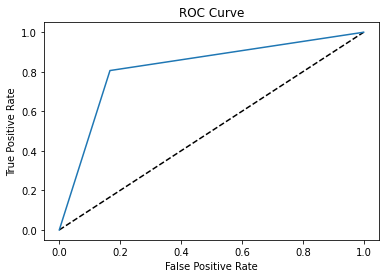

In [50]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [52]:
from sklearn import metrics

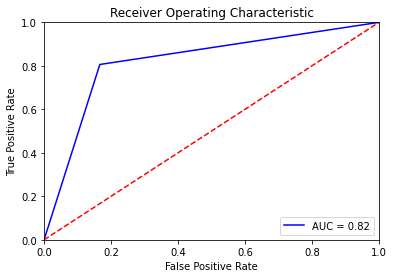

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()